In [1]:
from S_Matrix_env import*
from S_Matrix_Train import*
import matplotlib.pyplot as plt

In [2]:
Constrained_k = [5 + i for i in range(0, 20)]

# Model 1

In [3]:
String_Spec_1 = {
0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': 1/12}, {'m': sqrt(3), 'cl': 7/360}, {'m': sqrt(4), 'cl': 107/15120}, {'m': sqrt(5), 'cl': 5951/1814400}],
2: [{'m': sqrt(2), 'cl': 1/6}, {'m': sqrt(3), 'cl': 5/84},  {'m': sqrt(4), 'cl': 13/504}, {'m': sqrt(5), 'cl': 745/57024}],
4: [{'m': sqrt(3), 'cl': 9/280}, {'m': sqrt(4), 'cl': 76/3465}, {'m': sqrt(5), 'cl': 565/41184}],
6: [{'m': sqrt(4), 'cl': 16/2079}, {'m': sqrt(5), 'cl': 3125/399168}],
8: [{'m': sqrt(5), 'cl': 3125/1482624}]
}


String_1 = S_Matrix(String_Spec_1, String_Spec_1, Constrained_k)

In [4]:
Random_Spec_1 = {
0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': rand()}, {'m': sqrt(3), 'cl': rand()}, {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}],
2: [{'m': sqrt(2), 'cl': rand()}, {'m': sqrt(3), 'cl': rand()},  {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}],
4: [{'m': sqrt(3), 'cl': rand()}, {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}],
6: [{'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}],
8: [{'m': sqrt(5), 'cl': rand()}]
}
Random_Theory_1 = S_Matrix(Random_Spec_1, Random_Spec_1, Constrained_k)

In [6]:
print(String_1.Reward())
print(Random_Theory_1.Reward())

-0.009525741697428883
-0.7013402426198536


## Training

In [7]:
guess_steps = 5000
total_steps = 3000000
trapped = 50

reward_scale = 5e-3


freeze_Id = array([1.] * Random_Theory_1.dim)
freeze_Id[::2] = 0.
freeze_Id[1] = 0

initial_state = Random_Theory_1.Full_Spec

search_sizes = array([1e-2] * Random_Theory_1.dim)
search_sizes[::2] = 0.

state_min = [ (0 if i % 2 == 1 else - inf) for i in range(Random_Theory_1.dim) ]
state_max = [ (1 if i % 2 == 1 else + inf) for i in range(Random_Theory_1.dim) ]


In [8]:
env = Training_Env_New(
             Random_Theory_1, freeze_Id,
             min_state_bound = state_min, max_state_bound = state_max,
             guess_mode_steps = guess_steps, trapped_steps = trapped, 
             reward_scale=reward_scale, guess_size = search_sizes
             )

log_dir = "tmp/gym/String_v3"
os.makedirs(log_dir, exist_ok = True)
monitor = Monitor(env, log_dir)
model = SAC(MlpPolicy, monitor, verbose = 1, device = 'cuda', learning_rate = 1e-3, tensorboard_log="./tmp/string_v2/")
model.learn(total_timesteps = total_steps, log_interval = 100,)

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./tmp/string_v2/SAC_8
Action for improving:
[-0.         -0.         -0.         -0.00896045 -0.          0.00403577
 -0.         -0.00178851 -0.          0.00113296 -0.          0.00365845
  0.         -0.00342003 -0.          0.00026087 -0.          0.00053791
 -0.         -0.00643462  0.          0.00835571 -0.          0.00157172
 -0.         -0.00683459 -0.         -0.00555399 -0.         -0.00530606]
Action for improving:
[-0.          0.         -0.         -0.00448614 -0.          0.00427159
  0.         -0.00763578 -0.         -0.00433813  0.          0.00196669
 -0.          0.00797557 -0.         -0.00292533 -0.         -0.00953216
  0.          0.00516361  0.         -0.0027468   0.         -0.00566243
 -0.         -0.00453346 -0.         -0.0071112   0.         -0.0073763 ]
Action for improving:
[ 0.          0.          0.         -0.00115633  0.         -0.00512025
 -0.         -0.00812243  0.          0.0078

In [44]:
array([String_1.Crossing(), Random_Theory_1.Crossing()]).transpose()

array([[ 1.18573098e-08,  4.37694325e-11],
       [ 3.07493069e-05,  2.56709569e-07],
       [ 6.93338891e-05, -1.67353476e-05],
       [ 1.08489246e-07,  1.09554321e-09],
       [ 2.91038305e-11,  5.09317033e-11],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 7.27595761e-11,  0.00000000e+00],
       [ 0.00000000e+00,  7.27595761e-12],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 7.65488258e-06,  2.80322183e-08],
       [ 2.03499440e-09,  1.04591891e-11],
       [ 2.21007213e-10,  9.09494702e-13],
       [ 7.27595761e-12,  1.09139364e-11],
       [ 9.09494702e-12,  0.00000000e+00],
       [ 1.46883394e-09,  3.71073838e-10],
       [ 3.27418093e-11,  1.81898940e-11],
       [ 1.59161573e-11,  0.00000000e+00],
       [ 1.02634629e-03,  5.49539496e-05],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.81898940e-12,  0.00000000e+00],
       [ 1.43700163e-10,  2.63753464e-10],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.

In [39]:
Random_Theory_1.Update_Spec_with_new_spec(env.improv_hist[-1][-1])
print(Random_Theory_1.Reward())
Random_Theory_1.s_spec_dict

-0.00013114670915347613


{0: [{'m': 1.0, 'cl': 1.0},
  {'m': 1.4142135623730951, 'cl': 0.6763197076320651},
  {'m': 2.0, 'cl': 0.9627919232845307}],
 2: [{'m': 1.4142135623730951, 'cl': 0.0},
  {'m': 1.7320508075688772, 'cl': 0.5932013297080997},
  {'m': 2.0, 'cl': 0.9936134195327759},
  {'m': 2.23606797749979, 'cl': 0.9753576695919036}],
 4: [{'m': 1.7320508075688772, 'cl': 0.0},
  {'m': 2.0, 'cl': 0.0},
  {'m': 2.23606797749979, 'cl': 0.934484965801239}],
 6: [{'m': 2.0, 'cl': 0.0}, {'m': 2.23606797749979, 'cl': 0.0}],
 8: [{'m': 2.23606797749979, 'cl': 0.003931631445884701}]}

/var/folders/zk/pyxkkb6n4q95vw6rshpmt0jr0000gn/T/ipykernel_76766/98486742.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  improv_Steps = array(env.improv_hist)[:, 0]
/var/folders/zk/pyxkkb6n4q95vw6rshpmt0jr0000gn/T/ipykernel_76766/98486742.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  improv_Reward = ( (array(env.improv_hist)[:, 1]).astype(float) )


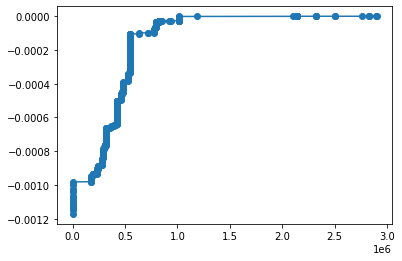

In [28]:
improv_Steps = array(env.improv_hist)[:, 0]
improv_Reward = ( (array(env.improv_hist)[:, 1]).astype(float) )
plt.plot(improv_Steps, improv_Reward, '-o')